In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, spearmanr
from utils_1 import barh_plot, corr_heatmap, dist_manh_plot


from sklearn.metrics.pairwise import pairwise_distances_argmin

# Проект по анализу данных на Python. Исследование рынка арендной недвижимости Нью-Йорка. 

В ходе данного проекта мы:
1. Выбрали тему
2. Взяли данные из готового dataset 
3. Обработали данные
4. Сделали визуализацию 
5. Создали новую переменную 
6. Сформулировали гипотезы
7. Попробовали предсказать некоторые переменные при помощи машинного обучения (!!!!!!)


# Загрузка данных

Воспользовались готовым датасетом по ссылке https://www.kaggle.com/datasets/ivanchvez/ny-rental-properties-pricing и загрузили оттуда данные. 

In [2]:
data = pd.read_csv('NY Realstate Pricing.csv')
data = data.drop(columns=['F1', 'id'])
data.head()

,neighbourhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020
0,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1
1,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1
2,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19
3,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365
4,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242


Далее добавляем данные о топ-10 университетах Нью-Йорка и их координатах, собранные при помощи Chat GPT. Они требуются для дальнейшего исследования стоимости арендной недвижимости в зависимости от удаленности от университетов.

Наш запрос был сформулирован следующим образом: Найди топ-10 университетов Нью-Йорка с их координатами.

Chat GPT выдал нам следующие данные:
Конечно! Вот координаты запрашиваемых университетов в Нью-Йорке:

1. Корнеллский университет (Cornell University):
Координаты: 42.448500° с. ш., -76.478600° з. д. (Мэйн-кампус в Итаке, штат Нью-Йорк)
2. Колумбийский университет (Columbia University):
Координаты: 40.807384° с. ш., -73.963036° з. д. (Морнингсайд-Хайтс, Манхэттен, Нью-Йорк)
3. Нью-йоркский университет (New York University):
Координаты: 40.724700° с. ш., -73.990300° з. д. (Гринвич-Виллидж, Манхэттен, Нью-Йорк)
4. Университет Рочестера (University of Rochester):
Координаты: 43.128330° с. ш., -77.628326° з. д. (Рочестер, штат Нью-Йорк)
5. Университет Сиракьюз (Syracuse University):
Координаты: 43.037700° с. ш., -76.134000° з. д. (Сиракьюз, штат Нью-Йорк)
6. Университет Буффало (University at Buffalo):
Координаты: 43.992830° с. ш., -78.773990° з. д. (Буффало, штат Нью-Йорк)
7. Координаты Рочестерского университета технологий (Rochester Institute of Technology):
Координаты: 43.084300° с. ш., -77.674470° з. д. (Рочестер, штат Нью-Йорк)
8. Фордхэмский университет (Fordham University):
Координаты: 40.856500° с. ш., -73.884610° з. д. (Бронкс, Нью-Йорк)
9. Ренсселерский политехнический институт (Rensselaer Polytechnic Institute):
Координаты: 42.730000° с. ш., -73.677500° з. д. (Трой, штат Нью-Йорк)
10. Университет Стоуни Брук (Stony Brook University):
Координаты: 40.914225° с. ш., -73.116086° з. д. (Стоуни Брук, Лонг-Айленд, Нью-Йорк)

In [3]:
universities = pd.read_csv('universities.csv', index_col=0)
universities

,Latitude,Longitude
University,,
Cornell University,42.448500,-76.478600
Columbia University,40.807384,-73.963036
New York University,40.724700,-73.990300
University of Rochester,43.128330,-77.628326
Syracuse University,43.037700,-76.134000
University at Buffalo; State University of New York,42.992830,-78.773990
Rochester Institute of Technology,43.084300,-77.674470
Fordham University,40.856500,-73.884610
Rensselaer Polytechnic Institute,42.730000,-73.677500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17614 entries, 0 to 17613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   neighbourhood          17614 non-null  object 
 1   latitude               17614 non-null  float64
 2   longitude              17614 non-null  float64
 3   room_type              17614 non-null  object 
 4   price                  17614 non-null  int64  
 5   days_occupied_in_2019  17614 non-null  int64  
 6   minimum_nights         17614 non-null  int64  
 7   number_of_reviews      17614 non-null  int64  
 8   reviews_per_month      17614 non-null  float64
 9   availability_2020      17614 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.3+ MB


# Обработка данных




Text(0.5, 1.0, 'Гистограмма логарифмированных цен на недвижимость')

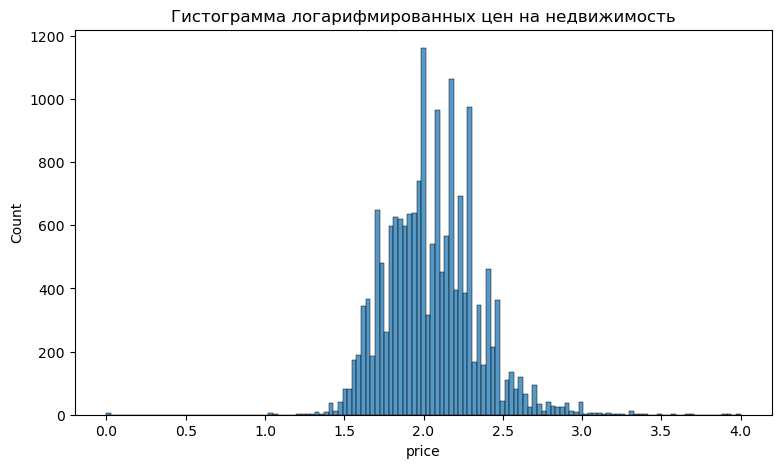

In [5]:
_, ax = plt.subplots(figsize=(9, 5))
sns.histplot(np.log10(data['price']+1));
ax.set_title('Гистограмма логарифмированных цен на недвижимость')

Удалили объявления с ценой аренды <= 10 и >= 2000, так как посчитали,  что  данные  объявлений могут быть фейковыми или с ненастоящей ценой.

In [6]:
data = data[data['price'] > 10]
data = data[data['price'] <= 2000]

Text(0.5, 1.0, 'Гистограмма логарифмированных цен на недвижимость')

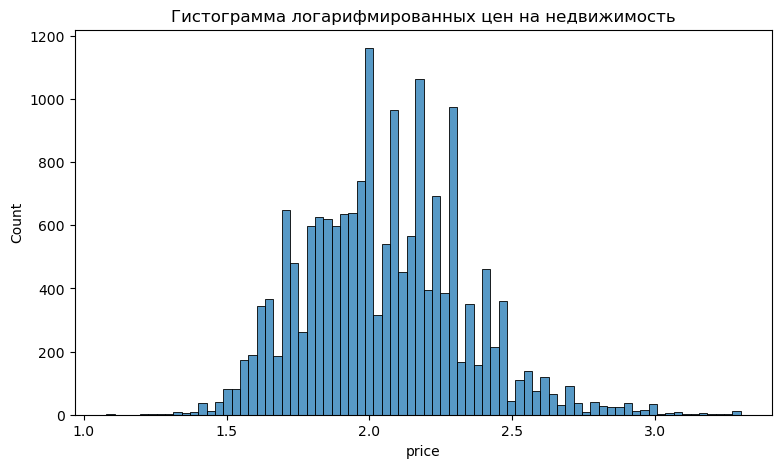

In [7]:
_, ax = plt.subplots(figsize=(9, 5))
sns.histplot(np.log10(data['price']+1));
ax.set_title('Гистограмма логарифмированных цен на недвижимость')

Строим диаграмму рассеяния минимального количества ночей, на которое можно снять недвижимость:

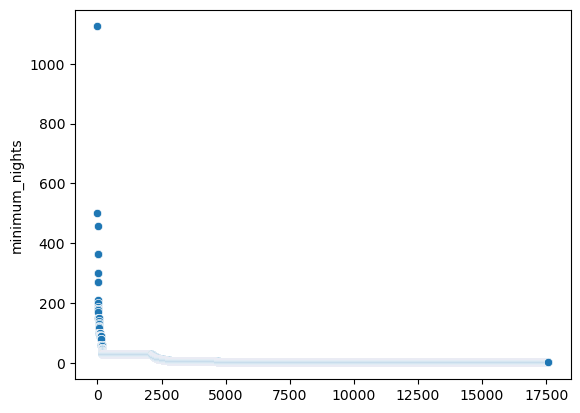

In [8]:
sns.scatterplot(y=data['minimum_nights'].sort_values(ascending=False), x=range(len(data)));

Убираем выбросы, замечанные на диаграмме рассеяния:

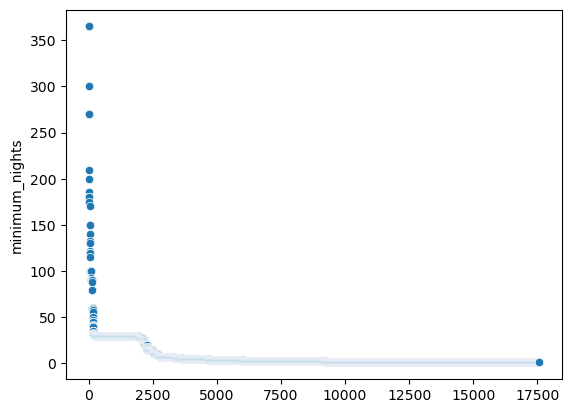

In [9]:
data = data[data['minimum_nights'] <= 366]
sns.scatterplot(y=data['minimum_nights'].sort_values(ascending=False), x=range(len(data)));

# Описание перменных

## Переменная neighbourhood

Находим количечство уникальных районов, в которых в Нью-Йорке сдается в аренду недвижимость

In [10]:
data['neighbourhood'].nunique()

186

Строим столбчатую диаграмму распределения недвижимости по топ-20 районам:

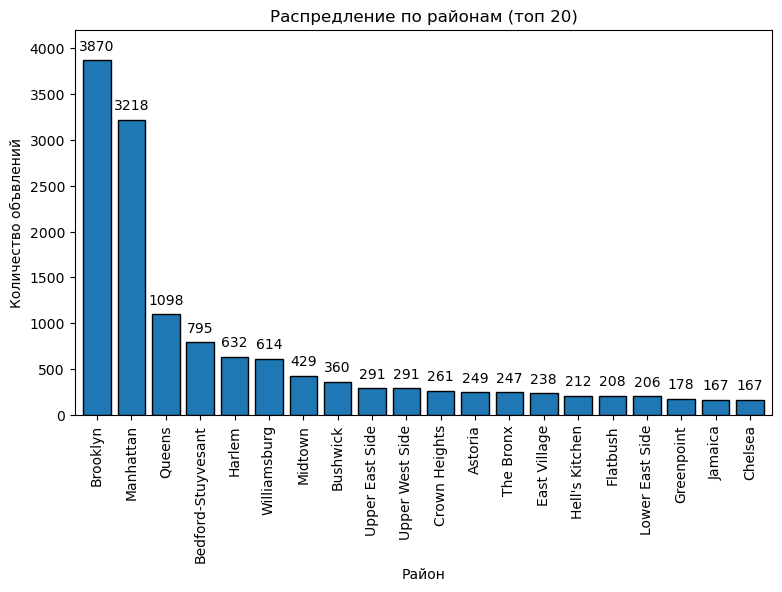

In [11]:
barh_plot(
    data['neighbourhood'].value_counts()[:20],
    (0, 4200),
    'Распредление по районам (топ 20)',
    'Район',
    'Количество объвлений'
)

### Вывод:
Заметим, что лидерами по количеству объявления являются Brooklyn и Manhattan

## Переменная room_type

Строим столбчатую диаграмму распределения недвижимости по типу объявлений:

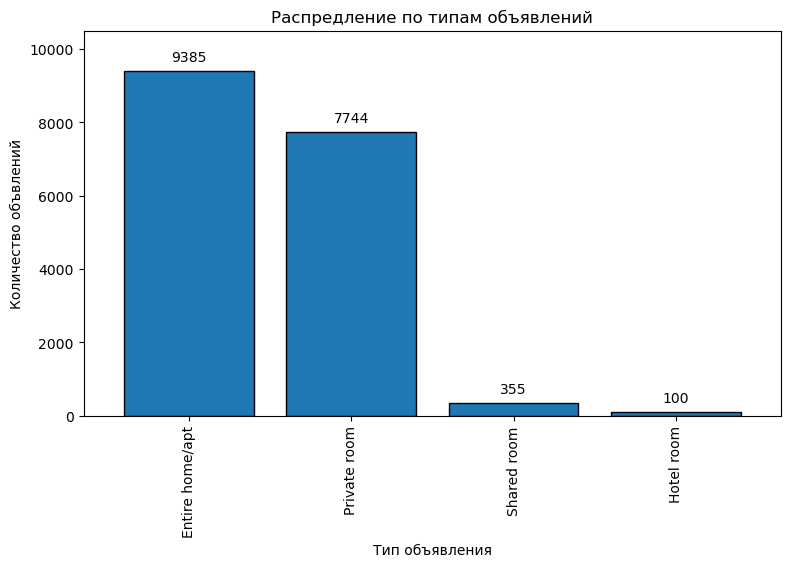

In [12]:
barh_plot(
    data['room_type'].value_counts(),
    (0, 10500),
    'Распредление по типам объявлений',
    'Тип объявления',
    'Количество объвлений'
)

### Вывод:
Заметим, что больше всего в аренду сдают Entire home/apt и Private room.

## Перейдем к рассмотрению числовых переменных

Создаем матрицу графиков, в которой каждая переменная рассматривается в паре с каждой другой переменной из этого же набора данных. Матрица графиков, где по диагонали расположены гистограммы для каждой переменной, а вне диагонали - графики рассеяния для соответствующих пар переменных.

Это полезно для визуализации взаимосвязей между переменными в наборе данных. Данная функция позволяет быстро и наглядно исследовать зависимости и распределения данных. Это особенно полезно при анализе множественных переменных и поиске взаимосвязей между ними.

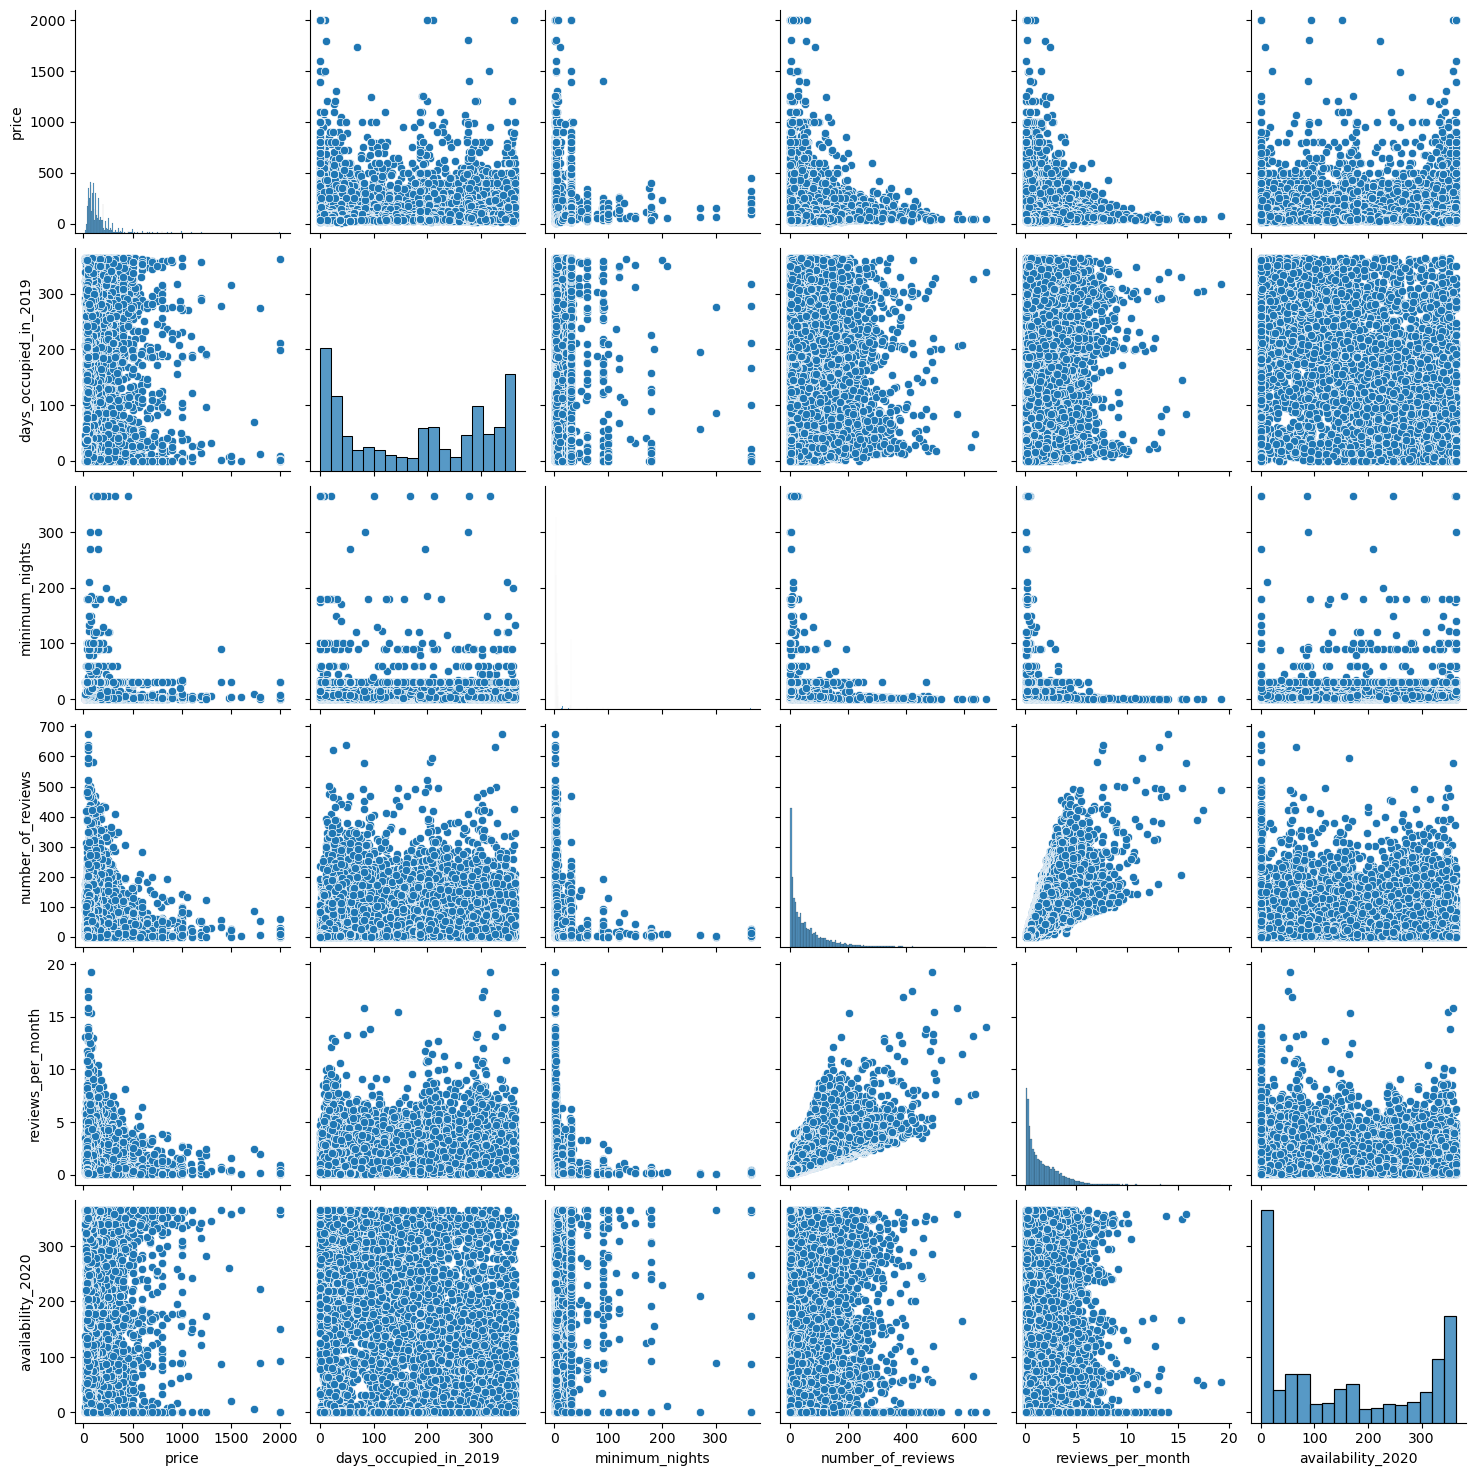

In [13]:
sns.pairplot(data.iloc[:, 4:]);

Исходя из вышеизложенной матрицы графиков, далее мы будем попарно рассмтаривать переменные между которыми была замечена определенная взаимосвязь

Далее мы используем Heatmap для визуализации корреляций между переменными




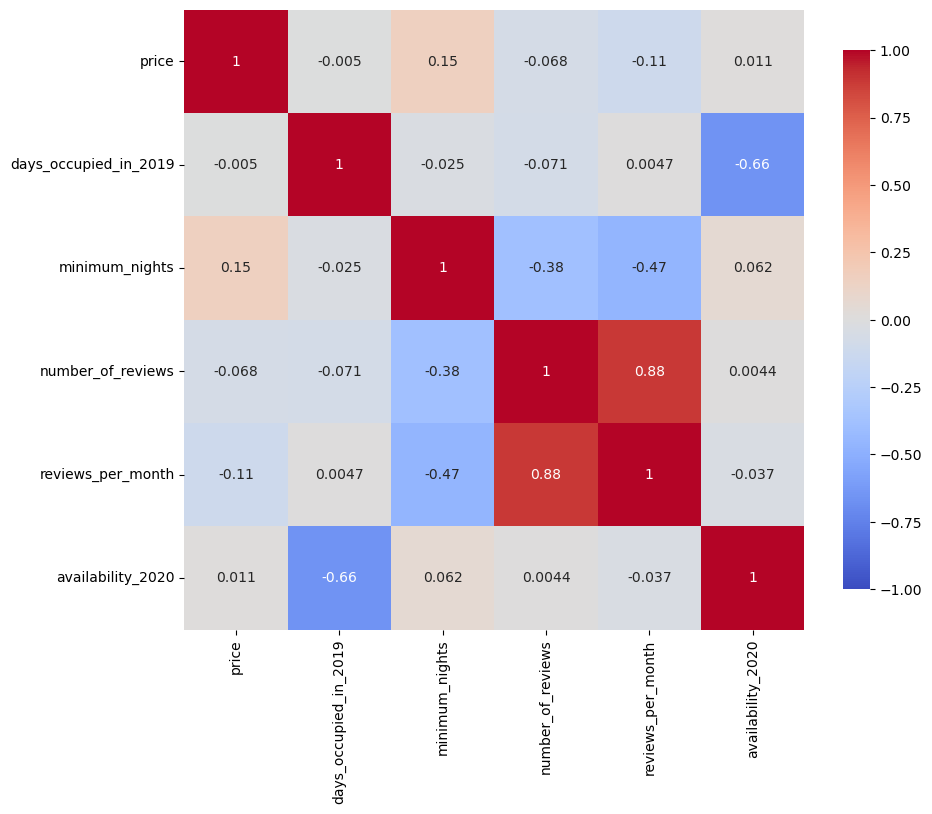

In [16]:
corr_heatmap(data.iloc[:, 4:].corr('spearman'))

### Вывод:
Чем ярче цвет пикселя, тем сильнее связь между переменными. Такая визуализация позволяет быстро оценить взаимосвязи и определить, какие переменные взаимодействуют между собой.

Наибольшую взаимосвязь заметели между следующими переменными: 
1. Количество отзывов в месяц (reviews_per_month) и общее количество отзывов (number_of_reviews), зависимомть положительная. 
2. Доступность недвижимости в 2020 году (availability_2020) и количсетом дней, которое данная недвижимость была занята в 2019 (days_occupied_in_2019), зависимоть отрицательная.

# Перейдем к поиску зависимостей




### Рассмотрим days_occupied_in_2019 против 1/availability_2020

Строим диаграмму рассеяиния days_occupied_in_2019 и availability_2020

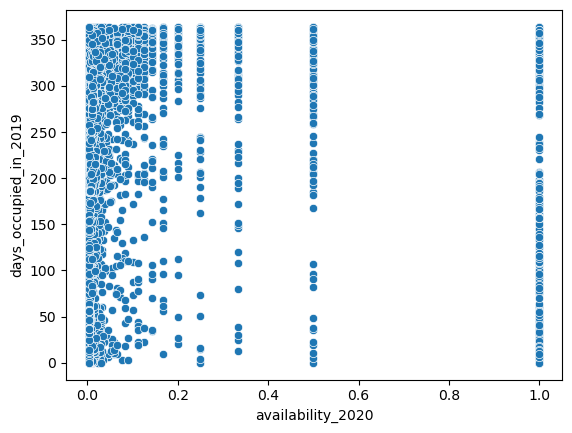

In [17]:
sns.scatterplot(y=data['days_occupied_in_2019'], x=1/(data['availability_2020']))
plt.show()


### Вывод:
Чем больше дней недвижимость была занята в 2019 году, тем менее достпуной она являлась в 2020. 

## Рассмотрим показатель цены в зависимости от типа объявления

Создаем новый столбец с логарифмированной ценой. И при помощи метода .desribe выводим сводную статистическую информацию о данных, включающую различные метрики: Count, Mean, Standard Deviation, Minimum, 25th Percentile, 50th Percentile, 75th Percentile, Maximum. 

In [18]:
(
    data
    .assign(price_log10 = np.log10(data['price']))
    .groupby('room_type')
    ['price_log10']
    .describe()
)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,9385.0,2.215727,0.225952,1.041393,2.075547,2.184691,2.332438,3.301030
Hotel room,100.0,2.156398,0.302785,1.544068,2.075547,2.176091,2.298853,3.095169
Private room,7744.0,1.860773,0.202080,1.301030,1.716003,1.845098,1.977724,3.203848
Shared room,355.0,1.695643,0.273818,1.176091,1.531479,1.653213,1.812913,3.255273


Строим ящики с усами для типа арендованной недвижимости по логарифмированной цене. 

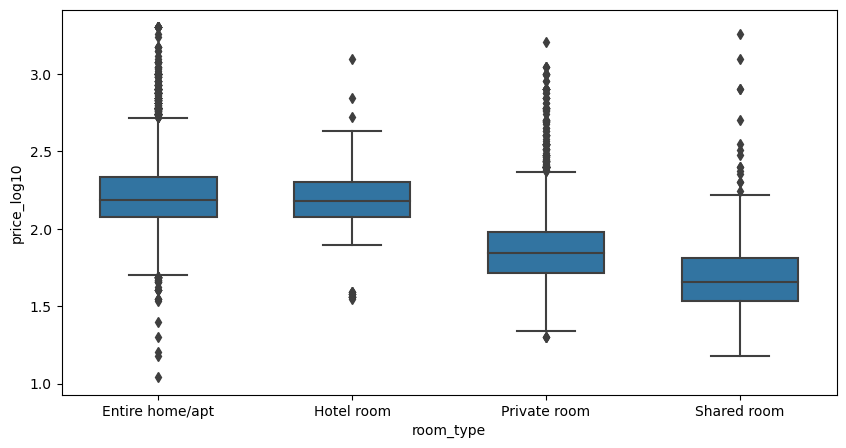

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=data.assign(price_log10 = np.log10(data['price'])),
    y='price_log10',
    x='room_type',
    color='C0',
    order=['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
    width=0.6
);

Ящик представляет собой интерквартильный диапазон, который охватывает 50% данных. Нижний квартиль (25-й процентиль) отмечается нижней границей ящика, а верхний квартиль (75-й процентиль) - верхней границей ящика. Разница между верхним и нижним квартилями представляет собой размах, который описывает разброс данных в среднем. Усы на графике ящика с усами представляют диапазон данных, исключая выбросы. 

Благодаря данному графику мы наблюдаем ценовой диапозон для каждого типа арендной недвижимости, а также выбросы и их количество. 
Самая высокой ценой обладают Entire home/apt, самой низкой - shared room. 

In [20]:
samples = [sub_df['price'].values for _, sub_df in data.groupby('room_type')]
kw_test = kruskal(*samples)
print('Kruskal Wallis test p-value:', kw_test.pvalue)

Kruskal Wallis test p-value: 0.0


Отвергаем нулевую гипотезу, что между типами объявлений нет разницы в цене

In [21]:
enitire_apt = data['room_type'].eq('Entire home/apt')
hotel_room = data['room_type'].eq('Hotel room')
shared_room = data['room_type'].eq('Shared room')
private_room = data['room_type'].eq('Private room')

## Изучаем цены представленной недвижимости в зависимотси от удаленности от центра. 
В качестве центра выбрали средние координаты долготы и широты района Манхеттен:
###### latitude     40.767560
###### longitude   -73.972965

In [22]:
coords_neigh_avg = data.groupby('neighbourhood')[['latitude', 'longitude']].mean()
data['dist_manhattan'] = np.sum((data[['latitude', 'longitude']] - coords_neigh_avg.loc['Manhattan'])**2, axis=1)
data['dist_manhattan']

0        0.000311
1        0.006967
2        0.000400
3        0.006798
4        0.000150
           ...   
17609    0.006580
17610    0.014985
17611    0.003364
17612    0.003423
17613    0.003325
Name: dist_manhattan, Length: 17584, dtype: float64

### Далее для каждого типа сдаваемой недвижимости рассматриваем зависимость цены в зависимости от удаленности от центра. 

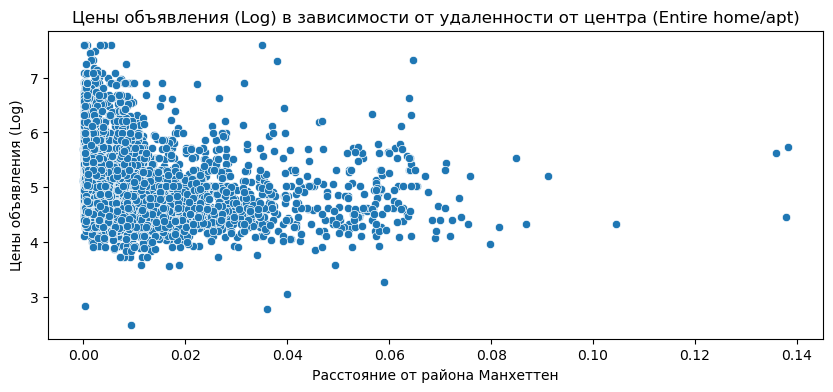

In [23]:
dist_manh_plot(
    data, y_col='price', log=True, ylabel='Цены объявления (Log)', mask=enitire_apt, mask_name='(Entire home/apt)'
)

### Вывод:
Чем ближе к центру находится сдаваемый Entire home/apt, тем выше цена.

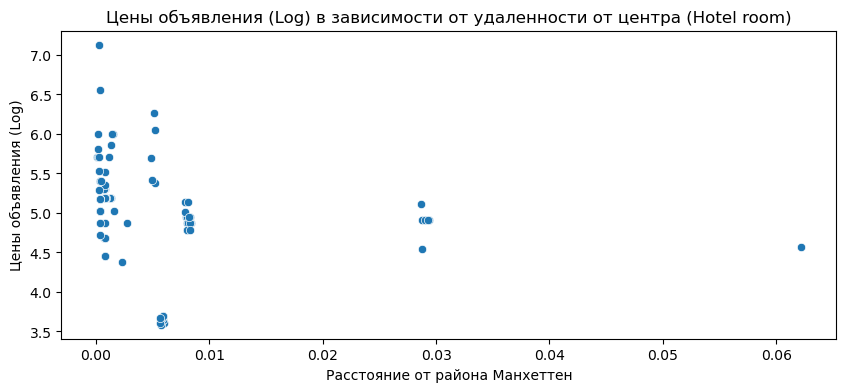

In [26]:
dist_manh_plot(
    data, y_col='price', log=True, ylabel='Цены объявления (Log)', mask=hotel_room, mask_name='(Hotel room)'
)

### Вывод:
Чтобы сделать точный вывод нехватает количества данных, но в целом прослеживается зависимость, что чем ближе к центру находится сдаваемый Hotel room, тем выше цена.

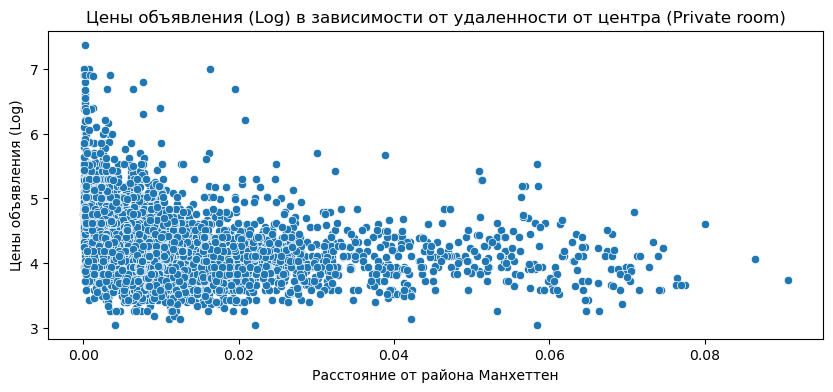

In [27]:
dist_manh_plot(
    data, y_col='price', log=True, ylabel='Цены объявления (Log)', mask=private_room, mask_name='(Private room)'
)

### Вывод:
Чем ближе к центру находится сдаваемый Private room, тем выше цена.

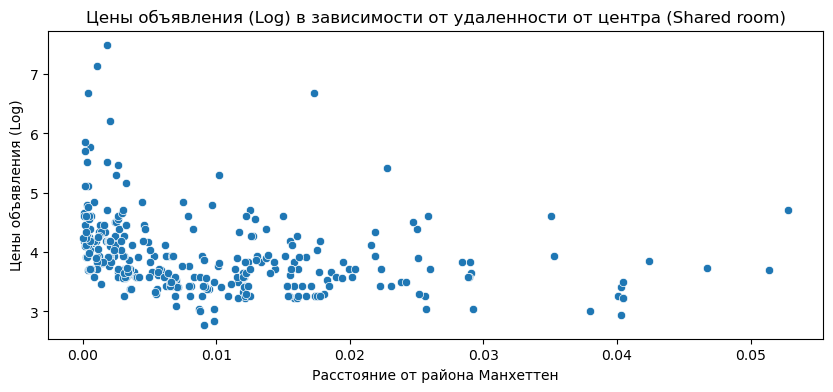

In [28]:
dist_manh_plot(
    data, y_col='price', log=True, ylabel='Цены объявления (Log)', mask=shared_room, mask_name='(Shared room)'
)

### Вывод:
На данном типе сдаваемой недвижимости зависимость прослеживается слабее всего. Можно заметить, что при значениях удаленности в интервале [0,00; 0,025] цена соответсвует примерно одному уровню. Это может быть связано с тем, что Shared room является наиболее бюджетным типом недвижимости. 

## Рассмотрим количество объявлений по каждому типу в зависимости удаленности от центра. 


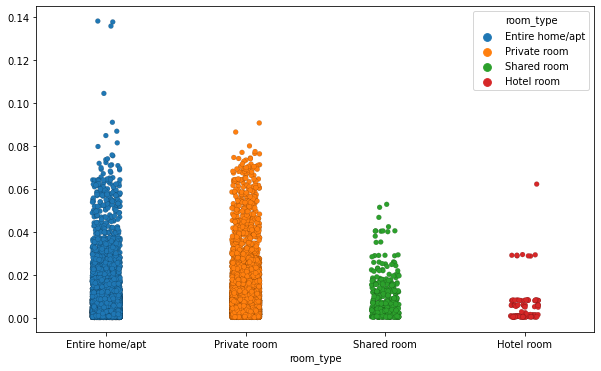

In [311]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    y=dist_manhattan,
    x=data['room_type'],
    hue=data['room_type'],
    edgecolor='k',
    linewidth=0.1
);

### Вывод: 
Переменная удаленность от центра выявляет интересные закономерности, поэтому ее можно использовать как отдельный признак. По графику видно, что нет объявлений Shared Room сильно удаленных от центра. Вероятно потому, что люди не видят смысла жертовавать комфортом вдалеке от центра. 
Также интересно заметить, что объявления Hotel room сконцентрированы на определнных местоположениях. Много объявлений такого типа находится в центре, но также и на удаленности от центра равной 0,03. Можно предположить, что на данной удаленности находится туристическая зона или развитая инфраструктура района. 

## Гипотеза

Если обратить внимание на Heatmap (In [355]) с корреляциями признаками, можно заметить, что цена не коррелирует существенно практически ни с одной переменной.

Цена, нормализованная по району и типу объявления потенциально может коррелировать с перменными, связанными с количеством отзывов, величиной периода аренды и т.д.


In [79]:
data['price_normalized'] = data['price'] /  data.groupby(['neighbourhood', 'room_type'])['price'].transform('median')

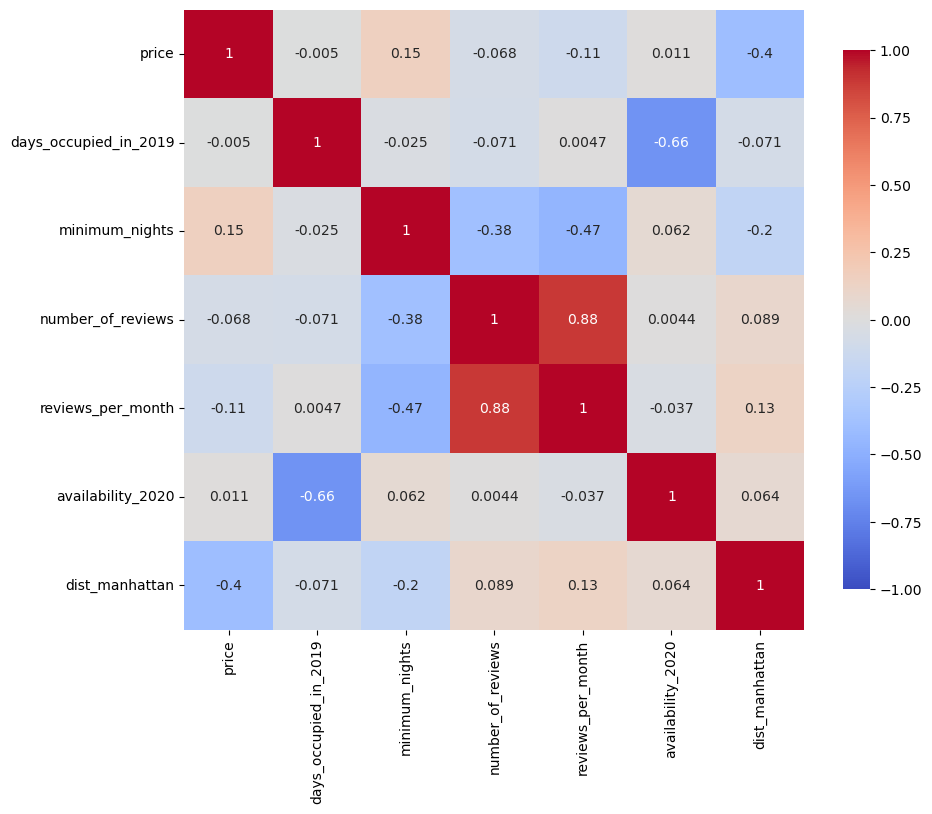

In [29]:
corr_heatmap(data.iloc[:, 4:].corr('spearman'))

При рассмотрении оригинальной цены, видно, что ее корреляция с минимальным периодои аренды - слабая положительная. В то время как корреляция нормализованной цены с минимальным периодои аренды - слабая отрицательная. 

### Продолжим рассмотрение предыдущих зависимостей, изучив зависимость между минимальным периодом аренды и удаленности от центра. 

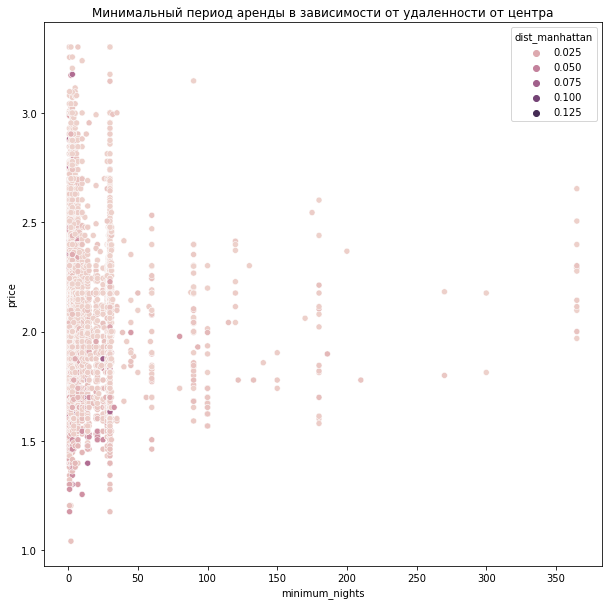

In [322]:
plt.figure(figsize=(10, 10))
s = sns.scatterplot(
    y=np.log10(data['price']),
    x=data['minimum_nights'],
    hue=data['dist_manhattan']
)
plt.title('Минимальный период аренды в зависимости от удаленности от центра');

### Вывод:
Можно заметить, что аренда недвижимости ближе к центру является более дорогой в краткосрочном периоде чем в долгосрочном

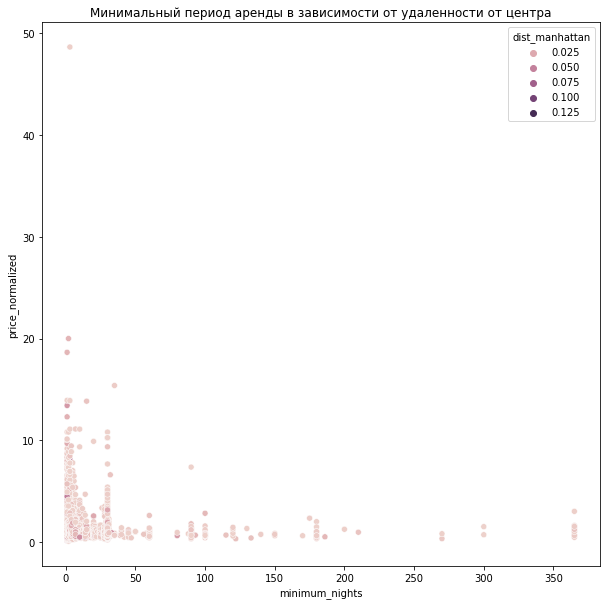

In [324]:
plt.figure(figsize=(10, 10))
s = sns.scatterplot(y=data['price_normalized'], x=data['minimum_nights'],
    hue=data['dist_manhattan'])
plt.title('Минимальный период аренды в зависимости от удаленности от центра');

## Вывод:
При нормализации цены на район и тип объявления, можно заметить, что краткосрочная аренда дороже долгосрочной

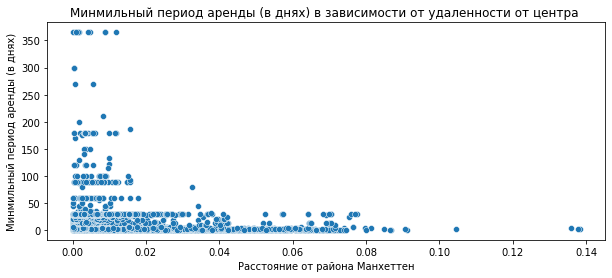

In [12]:
dist_manh_plot(data, 'minimum_nights', log=False, ylabel='Минмильный период аренды (в днях)')

### Вывод:
По данному графику можно заметить, что долгосрочная аренда больше всего распространена в районах, находящихся ближе к центру. В то время как краткосрочная аренда распространена как в центре, так и на удалении от центра.

## Далее подробнее рассмотрим новые собранные данные. Создаём новую переменную - удаленность от ближайшего универститета

Расмматривали топ-10 университетов Нью-Йорка

In [315]:
universities

,Latitude,Longitude
University,,
Cornell University,42.448500,-76.478600
Columbia University,40.807384,-73.963036
New York University,40.724700,-73.990300
University of Rochester,43.128330,-77.628326
Syracuse University,43.037700,-76.134000
University at Buffalo; State University of New York,42.992830,-78.773990
Rochester Institute of Technology,43.084300,-77.674470
Fordham University,40.856500,-73.884610
Rensselaer Polytechnic Institute,42.730000,-73.677500


In [326]:
university_dists = pairwise_distances(
    universities.values,
    data[['latitude', 'longitude']]
)

data['closest_univ_dist'] = university_dists.min(axis=0)

##### Мы решили рассмотреть зависимость количества таких типов объявлений как Private room и Shared room от удалённости от ближайшего университета, так как данные типы аренды наиболее популярны среди студентов 

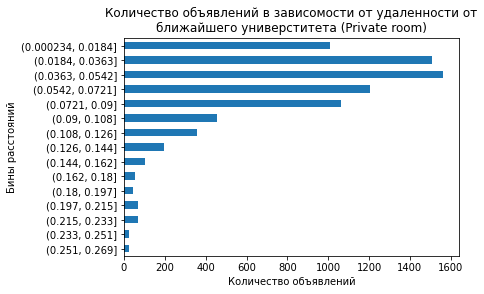

In [333]:
pd.cut(data[private_room]['closest_univ_dist'], 15).value_counts().sort_index()[::-1].plot(kind='barh')
plt.title('Количество объявлений в зависомости от удаленности от\nближайшего универститета (Private room)')
plt.ylabel('Бины расстояний')
plt.xlabel('Количество объявлений');

### Вывод:
По данному графику можно проследить закономерность, что чем ближе расстояние до ближайшего университета, тем больше возможных объявлений аренды Private room. Но итересно заметить, что при самом ближайшем расстоянии до университета количество объявлений меньше, чем чуть при большем расстоянии. Это может быть связано с тем, что определённое количество Private room закреплеы за университетом и не сдаются 

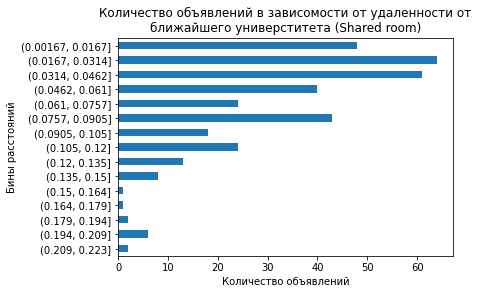

In [334]:
pd.cut(data[shared_room]['closest_univ_dist'], 15).value_counts().sort_index()[::-1].plot(kind='barh')
plt.title('Количество объявлений в зависомости от удаленности от\nближайшего универститета (Shared room)')
plt.ylabel('Бины расстояний')
plt.xlabel('Количество объявлений');

### Вывод:
По данному графику можно проследить закономерность, что чем ближе расстояние до ближайшего университета, тем больше возможных объявлений аренды Shared room. Итересно заметить, что при самом ближайшем расстоянии до университета количество объявлений меньше, чем чуть при большем расстоянии. Это может быть связано с тем, что определённое количество недвижимости при таком приближении к университету закреплено за ним. 